## Reconstruction of Complex Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import random
import operator as op
from functools import reduce
from tqdm import tqdm
import copy
import json

### Partitioning

In [18]:
def all_part_maker(N, size_list, color_list):
    return([partitioner(size_list, color_list) for i in range(N)])

def ncr(n, r):  #n choose r
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

def index_2d(myList, v):
    for i, x in enumerate(myList):
        if v in x:
            return (i, x.index(v))
        
def l_ij(alpha,beta, A_T,part):       #number of links between group i and j
    link_num = 0
    for a in part[alpha]:
        for b in part[beta]:
            if A_T[a, b] == 1:
                link_num += 1
    return(link_num)
                
    
def r_ij(alpha,beta, part):       #maximum possible number of links between group i and j
    return(len(part[alpha]) * len(part[beta]))

def R(i, j, A_T, all_part):   #all_part is a list containing all different partitions
    big_sum= 0
    Z=0
    for part in all_part:  

        sigma_i = index_2d(part, i)[0]
        sigma_j = index_2d(part, j)[0]
        l = l_ij(sigma_i , sigma_j , A_T, part)
        r = r_ij(sigma_i , sigma_j , part)
        paran = ((l + 1)/(r+2))

        gooz_list = [[x,y] for x in range(len(part)) for y in range(len(part)) if len(part[x])<len(part[y])]     
        pair_list=[]
        for x in gooz_list:
            if x not in pair_list: pair_list.append(x)
        H_P = 0
        for pair in pair_list:
            alpha, beta = pair
            l = l_ij(alpha, beta, A_T, part)
            r = r_ij(alpha, beta, part)
            h_p = math.log(r+1) + math.log(ncr(r, l))
            H_P += h_p
        Z += np.exp(-H_P)
        big_sum += paran* np.exp(-H_P)
        R_ij = big_sum/Z 
    # print('reliability of i={} and j={}:'.format(i, j), round(R_ij,4))
    return(round(R_ij,5))

def H(P):
    pair_list=[]
    H_P=0
    for i in range(len(P)):
        for j in range(len(P)):
            if i<j:
                pair_list.append([i,j])
    for pair in pair_list:
            alpha, beta = pair
            l = l_ij(alpha, beta, A_T, P)
            r = r_ij(alpha, beta, P)
            h_p = math.log(r+1) + math.log(ncr(r, l))
            H_P += h_p
    return(H_P)


# def Metro( T,ens):
#     e=[]
#     for i in range(ens):
#         partitions =  [[i] for i in range(40)].copy()
#         for kk in tqdm(range(T)):

#             partitions = [ele for ele in partitions if ele != []]
#             part_before=copy.deepcopy(partitions)

#             H0=H(partitions)
#             rpp=random.randint(0,len(partitions)-1)
#             m,n=index_2d(partitions,rpp)
#             a=partitions[m][n]
#             del partitions[m][n]
#             rp=random.randint(0,len(partitions)-1)
#             partitions[rp].append(a)
#             Hf=H(partitions)
#             deltaH=Hf-H0
#             if deltaH>0:
#                 if random.random() > np.exp(-deltaH):
#                     partitions=part_before.copy()
#             partitions = [ele for ele in partitions if ele != []]
            
#         ppp=copy.deepcopy(partitions)
#         e.append(ppp)
#     return(e)




def Metro(T,ens):
    e=[]
    for i in tqdm(range(ens)):
        partitions =  [[i] for i in range(40)].copy()
        c=0
        for kk in range(T):
            partitions = [ele for ele in partitions if ele != []]
            part_before=copy.deepcopy(partitions)

            H0=H(partitions)
            rpp=random.randint(0,len(partitions)-1)
            m,n=index_2d(partitions,rpp)
            a=partitions[m][n]
            del partitions[m][n]
            rp=random.randint(0,len(partitions)-1)
            partitions[rp].append(a)
            Hf=H(partitions)
            deltaH=Hf-H0
            if deltaH>0:
                if random.random() > np.exp(-deltaH):
                    partitions=part_before.copy()
            if H(partitions)==H(part_before):
                c=c+1
            if H(partitions)!=H(part_before):
                c=0
            #print(c)
            #print(H(partitions))
            if c>500:
                break
            partitions = [ele for ele in partitions if ele != []]
            
#         partitions = [ele for ele in partitions if ele != []]
        ppp=copy.deepcopy(partitions)
        e.append(ppp)
        print(H(partitions))
        print(kk)
    return(e)

In [3]:
A_T = np.load('A.npy')
A_O = np.load('Af.npy')
A_T

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [24]:
es = Metro(1000, 50)

  2%|█▋                                                                                 | 1/50 [00:04<03:41,  4.52s/it]

287.70279023687135
999



  4%|███▎                                                                               | 2/50 [00:08<03:30,  4.38s/it]

241.73615741890686
999



  6%|████▉                                                                              | 3/50 [00:13<03:22,  4.32s/it]

227.33960837513362
999



  8%|██████▋                                                                            | 4/50 [00:18<03:35,  4.69s/it]

252.71142705596063
999



 10%|████████▎                                                                          | 5/50 [00:23<03:31,  4.69s/it]

259.746519871252
999



 12%|█████████▉                                                                         | 6/50 [00:26<03:15,  4.44s/it]

259.95455826414116
999



 14%|███████████▌                                                                       | 7/50 [00:31<03:14,  4.51s/it]

246.823381294296
999



 16%|█████████████▎                                                                     | 8/50 [00:35<03:06,  4.45s/it]

268.0070963880257
999



 18%|██████████████▉                                                                    | 9/50 [00:41<03:10,  4.65s/it]

218.9466833481183
999



 20%|████████████████▍                                                                 | 10/50 [00:45<03:05,  4.63s/it]

221.8570201616916
999



 22%|██████████████████                                                                | 11/50 [00:49<02:56,  4.52s/it]

288.15434115852173
999



 24%|███████████████████▋                                                              | 12/50 [00:55<03:01,  4.77s/it]

273.2426834309126
999



 26%|█████████████████████▎                                                            | 13/50 [00:59<02:55,  4.75s/it]

263.6415757750617
999



 28%|██████████████████████▉                                                           | 14/50 [01:04<02:51,  4.78s/it]

221.53468702379527
999



 30%|████████████████████████▌                                                         | 15/50 [01:10<02:53,  4.96s/it]

242.664636099563
999



 32%|██████████████████████████▏                                                       | 16/50 [01:16<03:00,  5.30s/it]

276.2438661966438
999



 34%|███████████████████████████▉                                                      | 17/50 [01:21<02:57,  5.38s/it]

248.27903114800887
999



 36%|█████████████████████████████▌                                                    | 18/50 [01:27<02:58,  5.56s/it]

279.21921159439563
999



 38%|███████████████████████████████▏                                                  | 19/50 [01:33<02:55,  5.65s/it]

256.70746968781
999



 40%|████████████████████████████████▊                                                 | 20/50 [01:39<02:47,  5.58s/it]

261.51055809317035
999



 42%|██████████████████████████████████▍                                               | 21/50 [01:44<02:41,  5.58s/it]

242.4832871484264
999



 44%|████████████████████████████████████                                              | 22/50 [01:50<02:36,  5.58s/it]

244.28351644189783
999



 46%|█████████████████████████████████████▋                                            | 23/50 [01:56<02:33,  5.68s/it]

283.3908682541722
999



 48%|███████████████████████████████████████▎                                          | 24/50 [02:01<02:27,  5.66s/it]

259.0436387985821
999



 50%|█████████████████████████████████████████                                         | 25/50 [02:07<02:20,  5.63s/it]

248.29771865489988
999



 52%|██████████████████████████████████████████▋                                       | 26/50 [02:13<02:18,  5.75s/it]

253.95398971059316
999



 54%|████████████████████████████████████████████▎                                     | 27/50 [02:18<02:09,  5.63s/it]

252.283542936526
999



 56%|█████████████████████████████████████████████▉                                    | 28/50 [02:23<02:01,  5.51s/it]

242.5570897212407
999



 58%|███████████████████████████████████████████████▌                                  | 29/50 [02:29<01:53,  5.42s/it]

263.5883065209216
999



 60%|█████████████████████████████████████████████████▏                                | 30/50 [02:34<01:46,  5.34s/it]

249.78482314991402
999



 62%|██████████████████████████████████████████████████▊                               | 31/50 [02:39<01:42,  5.37s/it]

249.9810776410299
999



 64%|████████████████████████████████████████████████████▍                             | 32/50 [02:44<01:35,  5.33s/it]

279.8404392555874
999



 66%|██████████████████████████████████████████████████████                            | 33/50 [02:50<01:30,  5.32s/it]

267.02555709632634
999



 68%|███████████████████████████████████████████████████████▊                          | 34/50 [02:55<01:25,  5.34s/it]

300.2058099135004
999



 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [03:00<01:15,  5.05s/it]

236.5301396539117
999



 72%|███████████████████████████████████████████████████████████                       | 36/50 [03:04<01:09,  4.95s/it]

268.396119485677
999



 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [03:09<01:03,  4.86s/it]

244.36082098275847
999



 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [03:14<01:00,  5.03s/it]

275.594279470163
999



 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [03:19<00:55,  5.02s/it]

281.5205230454829
999



 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [03:24<00:50,  5.06s/it]

253.98396246228492
999



 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [03:30<00:46,  5.13s/it]

237.01382709864703
999



 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [03:36<00:42,  5.32s/it]

252.17838340870168
999



 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [03:41<00:37,  5.30s/it]

255.6554734855879
999



 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [03:46<00:31,  5.29s/it]

258.7414116005256
999



 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [03:51<00:26,  5.25s/it]

263.6638663496696
999



 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [03:57<00:21,  5.31s/it]

283.4876763423911
999



 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [04:03<00:16,  5.48s/it]

280.53535557495746
999



 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [04:08<00:10,  5.39s/it]

281.4360861278366
999



 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [04:13<00:05,  5.35s/it]

272.1295027042702
999


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:18<00:00,  5.18s/it]

277.1707035241792
999


In [12]:
#save
with open("es_20", "w") as fp:
    json.dump(es, fp)

In [ ]:
#load
with open("es", "r") as fp:
    b = json.load(fp)

### Missing Interactions (Removing Links)

In [25]:
def link_remover(A_T, ratio):
    one_index = np.where(A_T==1)
    one_list = [[one_index[0][i], one_index[1][i]] for i in range(len(one_index[0]))]
    r = random.sample(one_list, int(ratio * np.sum(A_T)/2))
    return(r)

#sorting 
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li.reverse()

#extract the first element
def Extract(lst):
    return list(list(zip(*lst))[0]) 

def acc(k):
    zeros=k.count(0)
    ones=k.count(1)
    ef=0
    for i in range(len(k)):
        if k[i]==1:
            ef+=k[i:].count(0)/zeros
    return ef/ones

In [26]:
zero_real = []
zero_index = np.where(A_T==0)

for i in tqdm(range(len(zero_index[0]))):
    zero_real.append(R(zero_index[0][i], zero_index[1][i], A_T, es))

100%|██████████████████████████████████████████████████████████████████████████████| 1400/1400 [00:52<00:00, 26.68it/s]


In [ ]:
rat=np.linspace(0.1,1,10)
    accs=[]
    for r in rat:
        A_T = np.load('A.npy')
        selected_links = link_remover(A_T, r) 
        for link in selected_links: A_T[link[0], link[1]] = 0 
        zero_fake=[]
        for i in selected_links:
            zero_fake.append(R(i[0], i[1], A_T, es))
        print('the mean value', round(np.mean(zero_fake),2))
        all_real = []
        for i in zero_fake: all_real.append([1, i])
        for i in zero_real: all_real.append([0, i])
        Sort(all_real)
        ext=Extract(all_real)
        accs.append(acc(ext))

Text(0.5, 1.0, 'Missing intractions')

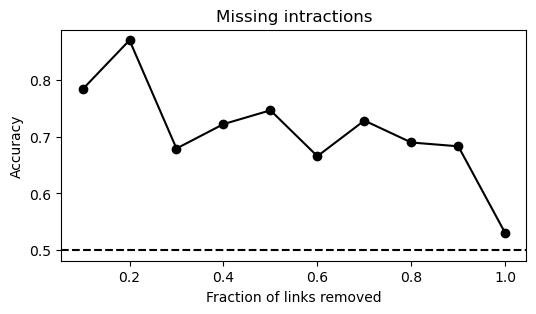

In [84]:
plt.figure(figsize=(6,3))
plt.plot(rat,accs,'-o',color='black')
plt.axhline(y = 0.5, color = 'k', linestyle = '--')
plt.ylabel('Accuracy')
plt.xlabel('Fraction of links removed')
plt.title('Missing intractions')



In [61]:
#Avraging
n=4
a=np.zeros((n,10))
for p in tqdm(range(n)):
    rat=np.linspace(0.1,1,10)
    accs=[]
    for r in rat:
        A_T = np.load('A.npy')
        selected_links = link_remover(A_T, r) 
        for link in selected_links: A_T[link[0], link[1]] = 0 
        zero_fake=[]
        for i in selected_links:
            zero_fake.append(R(i[0], i[1], A_T, es))
        print('the mean value', round(np.mean(zero_fake),2))
        all_real = []
        for i in zero_fake: all_real.append([1, i])
        for i in zero_real: all_real.append([0, i])
        Sort(all_real)
        ext=Extract(all_real)
        accs.append(acc(ext))
    a[p]=accs


  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

the mean value 0.3
the mean value 0.26
the mean value 0.28
the mean value 0.27
the mean value 0.26
the mean value 0.25
the mean value 0.23
the mean value 0.23
the mean value 0.22



 25%|█████████████████████                                                               | 1/4 [00:41<02:04, 41.34s/it]

the mean value 0.19
the mean value 0.3
the mean value 0.29
the mean value 0.28
the mean value 0.26
the mean value 0.27
the mean value 0.25
the mean value 0.24
the mean value 0.22
the mean value 0.21



 50%|██████████████████████████████████████████                                          | 2/4 [01:22<01:22, 41.40s/it]

the mean value 0.2
the mean value 0.31
the mean value 0.29
the mean value 0.28
the mean value 0.26
the mean value 0.26
the mean value 0.24
the mean value 0.25
the mean value 0.24
the mean value 0.22



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [01:58<00:38, 38.62s/it]

the mean value 0.21
the mean value 0.3
the mean value 0.33
the mean value 0.26
the mean value 0.28
the mean value 0.27
the mean value 0.24
the mean value 0.25
the mean value 0.23
the mean value 0.21


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:41<00:00, 40.46s/it]

the mean value 0.2


In [76]:
k=0
for i in a: k=k+i
means=k/len(a)

In [78]:
k=0
for i in a: k=k+i
means=k/len(a)
stds=np.zeros(10)
for i in range(len(a)):
    stds[i]=np.std(a[:,i])

In [80]:
stds

array([0.00960513, 0.06466751, 0.04646278, 0.01435993, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

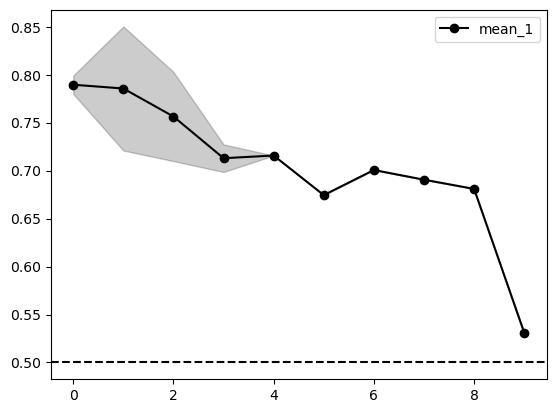

In [88]:
import matplotlib.pyplot as plt
import numpy as np

mean_1 = means
std_1 = stds

x = np.arange(len(mean_1))
plt.plot(x, mean_1, '-o',color='k', label='mean_1')
plt.fill_between(x, mean_1 - std_1, mean_1 + std_1, color='k', alpha=0.2)
plt.axhline(y = 0.5, color = 'k', linestyle = '--')

plt.legend()
plt.show()

### Spurious Intercations (Adding Links)

In [89]:
def link_adder(A_T, ratio):
    zero_index = np.where(A_T==0)
    zero_list = [[zero_index[0][i], zero_index[1][i]] for i in range(len(zero_index[0]))]
    r = random.sample(zero_list, int(ratio * np.sum(A_T)/2))
    return(r)

#sorting 
def Sort(sub_li):
    sub_li.sort(key = lambda x: x[1])
    return sub_li.reverse()

#extract the first element
def Extract(lst):
    return list(list(zip(*lst))[0]) 

def acc(k):
    zeros=k.count(0)
    ones=k.count(1)
    ef=0
    for i in range(len(k)):
        if k[i]==1:
            ef+=k[i:].count(0)/zeros
    return ef/ones

In [90]:
one_real = []
one_index = np.where(A_T==1)

for i in tqdm(range(len(one_index[0]))):
    one_real.append(R(one_index[0][i], one_index[1][i], A_T, es))

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 30.10it/s]


In [97]:
rat=np.linspace(0.1,1,10)
accs=[]
for r in rat:
    A_T = np.load('A.npy')
    selected_links = link_adder(A_T, r) 
    for link in selected_links: A_T[link[0], link[1]] = 1 
    one_fake=[]
    for i in selected_links:
        one_fake.append(R(i[0], i[1], A_T, es))
    print('the mean value', round(np.mean(one_fake),2))
    all_real = []
    for i in one_fake: all_real.append([0, i])
    for i in one_real: all_real.append([1, i])
    Sort(all_real)
    ext=Extract(all_real)
    accs.append(acc(ext))

the mean value 0.37
the mean value 0.33
the mean value 0.34
the mean value 0.38
the mean value 0.38
the mean value 0.38
the mean value 0.4
the mean value 0.41
the mean value 0.41
the mean value 0.41


Text(0.5, 1.0, 'ُSpurious intractions')

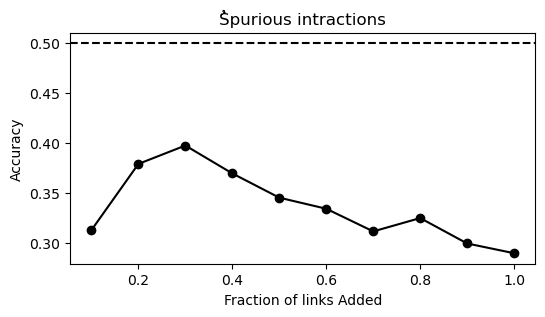

In [105]:
plt.figure(figsize=(6,3))
plt.plot(rat,accs,'-o',color='black')
plt.axhline(y = 0.5, color = 'k', linestyle = '--')

plt.ylabel('Accuracy')
plt.xlabel('Fraction of links Added')
plt.title('ُSpurious intractions')

In [37]:
A_O = np.load('Af.npy')
A_O

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [27]:
shape=np.shape(A_O)
R_mat=np.zeros(shape)

A_T = A_O
es = Metro(1000, 20)

  5%|▌         | 1/20 [00:02<00:39,  2.09s/it]

342.61291179896466
999


 10%|█         | 2/20 [00:04<00:36,  2.01s/it]

334.0148065910564
999


 15%|█▌        | 3/20 [00:06<00:34,  2.06s/it]

339.5767593503098
999


 20%|██        | 4/20 [00:07<00:31,  1.96s/it]

358.368533158362
999


 25%|██▌       | 5/20 [00:10<00:30,  2.02s/it]

365.51698193516523
999


 30%|███       | 6/20 [00:12<00:28,  2.01s/it]

355.0162274095114
999


 35%|███▌      | 7/20 [00:14<00:27,  2.13s/it]

350.4519550453538
999


 40%|████      | 8/20 [00:16<00:25,  2.09s/it]

356.93969446061357
999


 45%|████▌     | 9/20 [00:18<00:23,  2.10s/it]

363.7089269751955
999


 50%|█████     | 10/20 [00:20<00:20,  2.08s/it]

333.1023765962706
999


 55%|█████▌    | 11/20 [00:22<00:18,  2.08s/it]

317.79646546725644
999


 60%|██████    | 12/20 [00:24<00:16,  2.06s/it]

365.8211502293019
999


 65%|██████▌   | 13/20 [00:26<00:14,  2.02s/it]

348.67239057662624
999


 70%|███████   | 14/20 [00:28<00:12,  2.03s/it]

349.14049170408845
999


 75%|███████▌  | 15/20 [00:30<00:10,  2.10s/it]

377.4067528270955
999


 80%|████████  | 16/20 [00:32<00:08,  2.06s/it]

341.8193533594154
999


 85%|████████▌ | 17/20 [00:34<00:06,  2.04s/it]

345.1967857452546
999


 90%|█████████ | 18/20 [00:36<00:04,  2.05s/it]

359.95052217976183
999


 95%|█████████▌| 19/20 [00:39<00:02,  2.14s/it]

328.6409770147623
999


100%|██████████| 20/20 [00:41<00:00,  2.08s/it]

343.6209582742629
999


In [28]:
for i in range(shape[0]):
    for j in range(shape[1]):
        R_mat[i][j]= R(i,j, A_T, es)

In [39]:
A_T_copy  = A_T.copy()

In [52]:
A_T_copy

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [40]:
A_T_copy[np.where(R_mat > 0.9)] = 1
A_T_copy[np.where(R_mat < 0.1)] = 0

In [32]:
A_TT = np.load('A.npy')

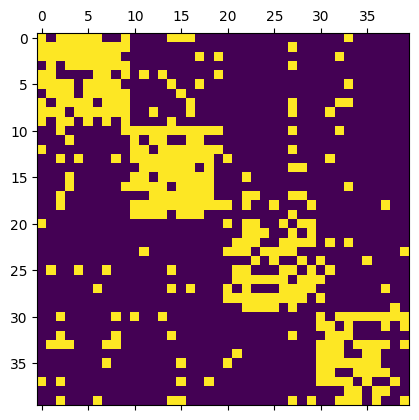

In [33]:
plt.matshow(A_T_copy)

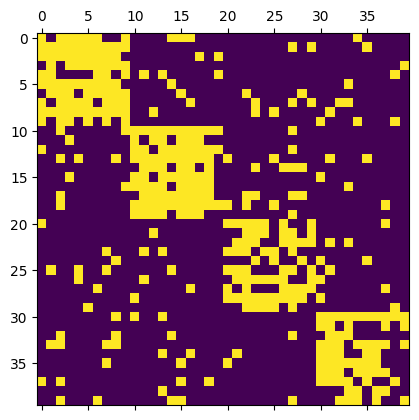

In [34]:
plt.matshow(A_TT)

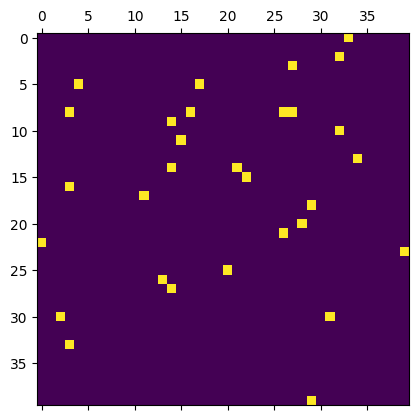

In [38]:
plt.matshow(abs(A_O - A_TT))

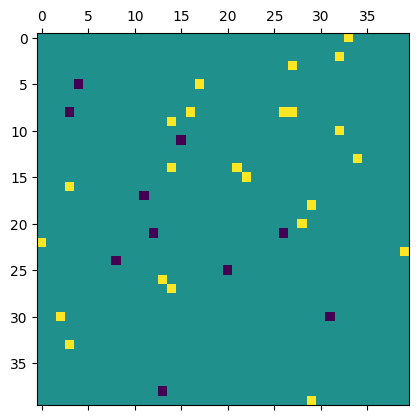

In [42]:
plt.matshow(A_T_copy - A_TT)

(array([212., 290., 327., 195., 415.,  63.,  21.,  54.,  18.,   5.]),
 array([0.04834 , 0.126778, 0.205216, 0.283654, 0.362092, 0.44053 ,
        0.518968, 0.597406, 0.675844, 0.754282, 0.83272 ]),
 <BarContainer object of 10 artists>)

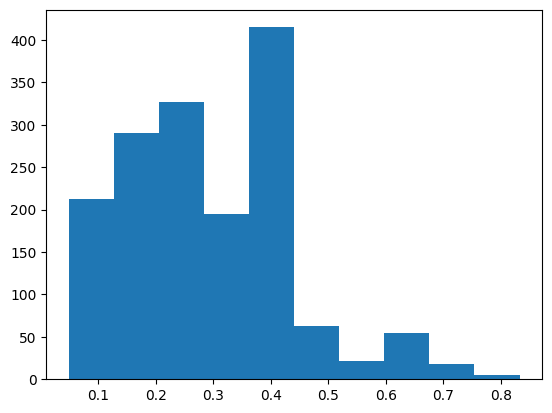

In [48]:
plt.hist(R_mat.ravel())

In [46]:
R_mat

array([[0.42493, 0.42493, 0.42493, ..., 0.10214, 0.12856, 0.10342],
       [0.42493, 0.42493, 0.42493, ..., 0.10214, 0.12856, 0.10342],
       [0.42493, 0.42493, 0.42493, ..., 0.10214, 0.12856, 0.10342],
       ...,
       [0.2333 , 0.2333 , 0.2333 , ..., 0.33333, 0.52115, 0.31611],
       [0.07818, 0.07818, 0.07818, ..., 0.52207, 0.18843, 0.24302],
       [0.27582, 0.27582, 0.27582, ..., 0.34087, 0.24358, 0.6167 ]])